In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from tensorflow.keras.models import load_model

In [3]:
model= load_model('F:/vs code/farmer/testhtmls/grapes_model_prad.h5')

In [4]:
# Load and preprocess the image for prediction
def preprocess_image(image_path):
    image = Image.open(image_path)
    new_size = (224, 224)
    resized_image_pil = image.resize(new_size, Image.LANCZOS)
    resized_image_array_pil = np.array(resized_image_pil)
    resized_image_array_pil = resized_image_array_pil / 255.0  # Normalize pixel values to be between 0 and 1
    resized_image_array_pil = np.expand_dims(resized_image_array_pil, axis=0)  # Add batch dimension
    return resized_image_array_pil

In [26]:
# Example usage
image_path ="C:/Users/safal/Downloads/grape leaf blight.jpg"
preprocessed_image = preprocess_image(image_path)

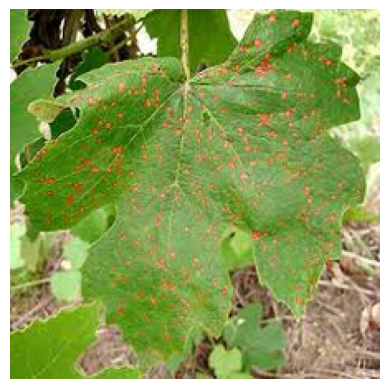

In [27]:
plt.imshow(preprocessed_image[0])
plt.axis("off")
plt.show()

In [28]:
# Make a prediction using the loaded model
predictions = model.predict(preprocessed_image)

1/1 [==============================] - 0s 51ms/step


In [29]:
predictions

array([[9.994035e-01, 5.166968e-04, 7.987126e-05, 6.216856e-09]],
      dtype=float32)

In [30]:
# Assuming your model has categorical output
predicted_class_index = np.argmax(predictions, axis=1)

In [31]:
print(predicted_class_index)

[0]


In [32]:
# Map the predicted index to the class name (replace class_names with your actual class names)
class_names=['Grape___Black_rot', 'Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy']

In [33]:
predicted_class_name = class_names[predicted_class_index[0]]

In [35]:
print("Predicted Class:", predicted_class_name)

Predicted Class: Grape___Black_rot
